In [12]:
from sklearn import datasets
digits = datasets.load_digits()
print (digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [13]:
# a form of summary of the data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

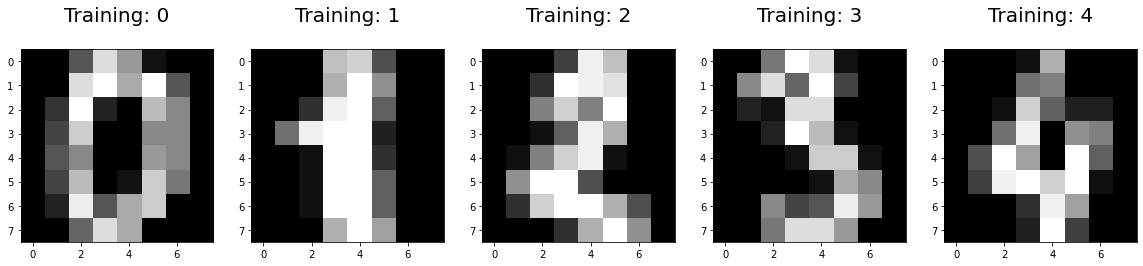

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [15]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print (X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [16]:
# 3.2 batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    n, m = X_train.shape
    k = (np.unique(y_train).shape[0])
    W = np.zeros((m,k))
    b = np.zeros((n,k))
    y_hat = 0
    loss_prev = []
    stop_threshold = 1.0e-4
    eta = 0.1
    count = 0
    prev_loss = 0
    
    while(1):
        z = np.dot(X_train,W) + b
        #logits
        Z = z - np.max(z, axis = 1, keepdims=True)
        #softmax
        ki = np.exp(Z)
        y_hat = ki / np.sum(ki, axis=1, keepdims=True)
        #loss
        loss = np.mean(-np.log(y_hat[range(n),y_train])) + (eta/2)*(np.linalg.norm(W)**2)
        loss_prev.append(loss)
        if count > 1 and np.abs(loss - prev_loss) <= stop_threshold:
            print("count: ",count)
            print("loss: ",loss)
            break
        prev_loss = loss
        y_onehot = np.zeros((y_train.size,10))
        y_onehot[np.arange(y_train.size),y_train] = 1
        dW = np.dot(X_train.T, y_hat - y_onehot) / n + eta*W
        db = np.sum((y_hat - 1), axis = 0, keepdims=True)/n

        W -= learning_rate*dW
        b -= learning_rate*db
        #i = i+1
        #i = 0
        count = count + 1
    return W, b, loss, loss_prev

W, b, loss, loss_prev = LogisticRegression_GD(X_train, y_train, 0.05)
#print(loss_prev)
# W, b, loss_prev = LogisticRegression_GD(X_train, y_train, 0.05)
# print(loss_prev)


count:  211
loss:  0.21522548302621042


---------------------------------------
learning rate = 0.05
count:  211
loss:  0.21522548302621042
training precision = 0.9844097995545658
count:  232
loss:  0.1702401258512822
test precision = 0.9977777777777778
---------------------------------------
learning rate = 0.005
count:  345
loss:  0.18986634434574098
training precision = 0.9747587230883444
count:  364
loss:  0.1627648710720514
test precision = 0.9933333333333333
---------------------------------------
learning rate = 0.01
count:  239
loss:  0.18032210719534472
training precision = 0.9769858945805494
count:  248
loss:  0.1532693624019695
test precision = 0.9933333333333333


Text(0, 0.5, 'loss')

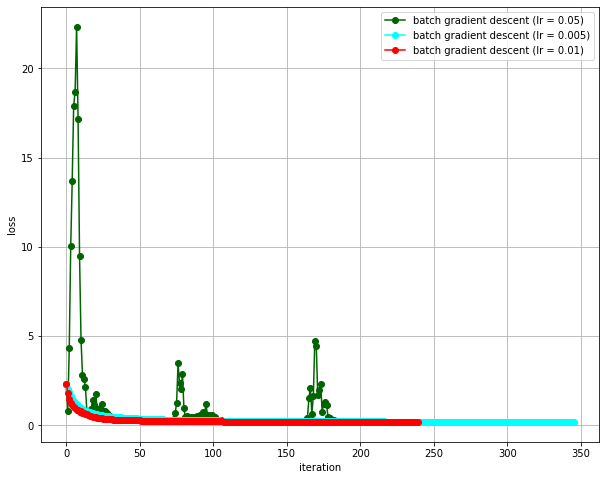

In [17]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print ('---------------------------------------')
    print ('learning rate =', learning_rate[i])
    
    W, b, loss_GD, loss_prev = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    
    def accuracy(y_pred, y_true):
        correct = 0
        wrong = 0
        for i in range(len(y_pred)):
            if (y_pred[i] == y_true[i]):
                correct += 1
            elif (y_pred[i] != y_true[i]):
                wrong += 1
        accuracy = correct / (correct + wrong)
        return accuracy
    
    #TODO
    z = np.dot(X_train,W) + b
    #logits
    Z = z - np.max(z, axis = 1, keepdims=True)
    #softmax
    ki = np.exp(Z)
    y_hat = ki / np.sum(ki, axis=1, keepdims=True)
    y_pred = np.argmax(y_hat,axis=1)
    prec_train = accuracy(y_pred,y_train)
    print ('training precision =', prec_train)

    #TODO
    W1, b1, loss_GD1, loss_prev1 = LogisticRegression_GD(X_test, y_test, learning_rate[i])
    z1 = np.dot(X_test,W1) + b1
    #logits
    Z1 = z1 - np.max(z1, axis = 1, keepdims=True)
    #softmax
    ki1 = np.exp(Z1)
    y_hat1 = ki1 / np.sum(ki1, axis=1, keepdims=True)
    y_pred1 = np.argmax(y_hat1,axis=1)
    prec_test = accuracy(y_pred1,y_test)
    print ('test precision =', prec_test)
    
    plt.plot(loss_prev, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [19]:
#final################# # 3.3 stochastic gradient descent (SGD) for Logistic regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    
    #TODO: initialization
    notstop = True
    epoch = 0
    loss = []
    loss_history = []
    
    n, m = X.shape
    W = np.zeros((64,10))
    b = np.zeros((1,10))

    # optimization loop	
    while notstop and epoch < max_epoch:
        
        #TODO: SGD of each epoch
    
        #shuffling for every epoch
        indices_new = np.random.permutation(n)
        X_new = X[indices_new]
        y_new = y[indices_new]
        batches = [(X[l:l+batch_size], y[l:l+batch_size]) for l in range(0,n,batch_size)]
        for batch in batches[: -1]:
            X_batch, y_batch = batch[0], batch[1]
            #computing the gradient
            z = np.dot(X_batch,W) + b
            #logits
            Z = z - np.max(z, axis = 1, keepdims=True)
            #softmax
            ki = np.exp(Z)
            y_hat = ki / np.sum(ki, axis=1, keepdims=True)
            y_onehot = np.zeros((y_batch.size,10))
            y_onehot[np.arange(y_batch.size),y_batch] = 1
            loss1 = np.mean(-np.log(y_hat[range(batch_size),y_batch])) + eta*(np.linalg.norm(W)**2)/2
            loss_history.append(loss1)
            dW = np.dot(X_batch.T, y_hat - y_onehot) / batch_size + eta*W
            db = np.sum((y_hat - 1), axis = 0, keepdims=True)/ batch_size
            #TODO
            W -= lr*dW
            b -= lr*db
            
        loss.append(np.mean(loss_history))
        loss_history = []
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print ('reduce learning rate to', lr)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                print("loss in loop: ", loss[-1])
                print("epoch size: ", epoch)
                break
            
        epoch += 1
        


    return (W, b, loss)
W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 100, 0.01, eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)


loss in loop:  0.23764523187369768
epoch size:  37


---------------------------------------
batch_size = 10
loss in loop:  0.3343988282640945
epoch size:  21
loss:  0.3343988282640945
training precision = 0.9086859688195991
loss in loop:  0.3343988282640945
epoch size:  21
test precision = 0.8911111111111111
---------------------------------------
batch_size = 50
loss in loop:  0.24113280164776704
epoch size:  24
loss:  0.24113280164776704
training precision = 0.9792130660727543
loss in loop:  0.24113280164776704
epoch size:  24
test precision = 0.9688888888888889
---------------------------------------
batch_size = 100
loss in loop:  0.23764523187369768
epoch size:  37
loss:  0.23764523187369768
training precision = 0.9799554565701559
loss in loop:  0.23764523187369768
epoch size:  37
test precision = 0.9711111111111111


Text(0, 0.5, 'loss')

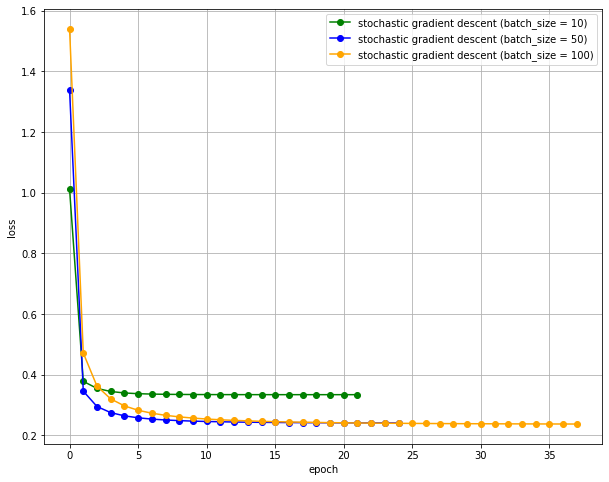

In [20]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.01, 0.01, 0.01]
fig, ax = plt.subplots(figsize=(10, 8))

def accuracy(y_pred, y_true):
  correct = 0
  wrong = 0
  for i in range(len(y_pred)):
      if (y_pred[i] == y_true[i]):
          correct += 1
      elif (y_pred[i] != y_true[i]):
          wrong += 1
  accuracy = correct / (correct + wrong)
  return accuracy

for i in range(len(bs)):
    
    print ('---------------------------------------')
    print ('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    print("loss: ", loss_SGD[-1])
    #TODO
    z = np.dot(X_train,W) + b
    #logits
    Z = z - np.max(z, axis = 1, keepdims=True)
    #softmax
    ki = np.exp(Z)
    y_hat = ki / np.sum(ki, axis=1, keepdims=True)
    y_pred = np.argmax(y_hat,axis=1)
    prec_train = accuracy(y_pred,y_train)
    print ('training precision =', prec_train)
    
    #TODO
    W1, b1, loss_SGD1 = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    z1 = np.dot(X_test,W1) + b1
    #logits
    Z1 = z1 - np.max(z1, axis = 1, keepdims=True)
    #softmax
    ki1 = np.exp(Z1)
    y_hat1 = ki1 / np.sum(ki1, axis=1, keepdims=True)
    y_pred1 = np.argmax(y_hat1,axis=1)
    prec_test = accuracy(y_pred1,y_test)
    print ('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
loss in loop:  0.23795921771957634
epoch size:  35
loss:  0.23795921771957634
training precision = 0.9814402375649591
loss in loop:  0.23795921771957634
epoch size:  35
test precision = 0.9666666666666667
---------------------------------------
batch_size = 50
loss in loop:  0.23534767894321545
epoch size:  36
loss:  0.23534767894321545
training precision = 0.9799554565701559
loss in loop:  0.23534767894321545
epoch size:  36
test precision = 0.9688888888888889
---------------------------------------
batch_size = 100
loss in loop:  0.23764523187369768
epoch size:  37
loss:  0.23764523187369768
training precision = 0.9799554565701559
loss in loop:  0.23764523187369768
epoch size:  37
test precision = 0.9711111111111111


Text(0, 0.5, 'loss')

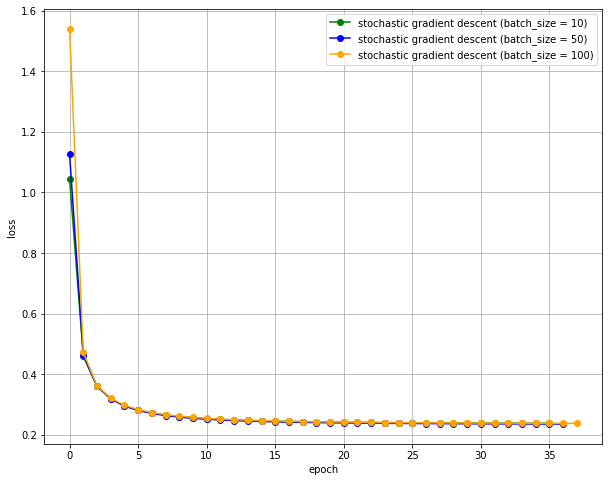

In [21]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.001, 0.005, 0.01]
fig, ax = plt.subplots(figsize=(10, 8))

def accuracy(y_pred, y_true):
  correct = 0
  wrong = 0
  for i in range(len(y_pred)):
      if (y_pred[i] == y_true[i]):
          correct += 1
      elif (y_pred[i] != y_true[i]):
          wrong += 1
  accuracy = correct / (correct + wrong)
  return accuracy

for i in range(len(bs)):
    
    print ('---------------------------------------')
    print ('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    print("loss: ", loss_SGD[-1])
    #TODO
    z = np.dot(X_train,W) + b
    #logits
    Z = z - np.max(z, axis = 1, keepdims=True)
    #softmax
    ki = np.exp(Z)
    y_hat = ki / np.sum(ki, axis=1, keepdims=True)
    y_pred = np.argmax(y_hat,axis=1)
    prec_train = accuracy(y_pred,y_train)
    print ('training precision =', prec_train)
    
    #TODO
    W1, b1, loss_SGD1 = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    z1 = np.dot(X_test,W1) + b1
    #logits
    Z1 = z1 - np.max(z1, axis = 1, keepdims=True)
    #softmax
    ki1 = np.exp(Z1)
    y_hat1 = ki1 / np.sum(ki1, axis=1, keepdims=True)
    y_pred1 = np.argmax(y_hat1,axis=1)
    prec_test = accuracy(y_pred1,y_test)
    print ('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [23]:
import time

start_time = time.time()
W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 100, 0.01, eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
print("Time taken by the function:", time.time() - start_time, "seconds")

loss in loop:  0.23764523187369768
epoch size:  37
Time taken by the function: 0.10736489295959473 seconds


In [24]:
import time

start_time = time.time()
W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 50, 0.005, eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
print("Time taken by the function:", time.time() - start_time, "seconds")

loss in loop:  0.23534767894321545
epoch size:  36
Time taken by the function: 0.2969343662261963 seconds


In [25]:
import time

start_time = time.time()
W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 10, 0.001, eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
print("Time taken by the function:", time.time() - start_time, "seconds")

loss in loop:  0.23795921771957634
epoch size:  35
Time taken by the function: 0.825995922088623 seconds
